## Body Performance Analysis

From our [quick analysis](0_Quick_EDA.ipynb) we have already gained some quick insights into our [data](https://www.kaggle.com/datasets/kukuroo3/body-performance-data). Now that are data is cleaned, it is finally time to explore the relationships between the these health and fitness data points in more detail.



In [251]:
# import initial required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns_palette = sns.color_palette("Blues", as_cmap=True)
import textwrap

import logging
logging.basicConfig(level=logging.INFO)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#load cleaned data
df = pd.read_parquet('../data/bodyPerformance_cleaned.gzip')

df.sample(n=5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
12760,38.0,1,173.5,78.2,23.9,77.0,123.0,44.8,7.4,33.0,214.0,3
5110,26.0,0,158.7,55.8,32.4,82.0,120.0,27.9,17.5,30.0,160.0,2
10893,39.0,1,170.7,71.0,19.8,70.0,104.0,38.1,21.0,58.0,203.0,2
2960,29.0,0,157.3,50.9,21.4,65.0,120.0,22.7,21.4,40.0,185.0,1
12942,51.0,0,155.6,65.0,37.0,81.0,122.0,28.5,24.4,12.0,141.0,4


The data contains physical fitness measurement data. Of these measurements, 7 are characteristic measures of the participants (eg. age, height, body fat %, blood pressure) and 4 are fitness related measures (eg. grip force and broad jump ability). The last variable in the dataset, *class*, classifies the participants into groups with class 1 (A) being the best performing group.



## Analysis
The questions I am curious to explore are the following:

1. What percantage of the participants are within prescribed levels of bmi?
2. Does fitness performance decline with age?
3. Does gender have an impact on fitness performance?

### Correlation analysis
Let's have a look at how the features correlate to the assigned performance measure, *class*.

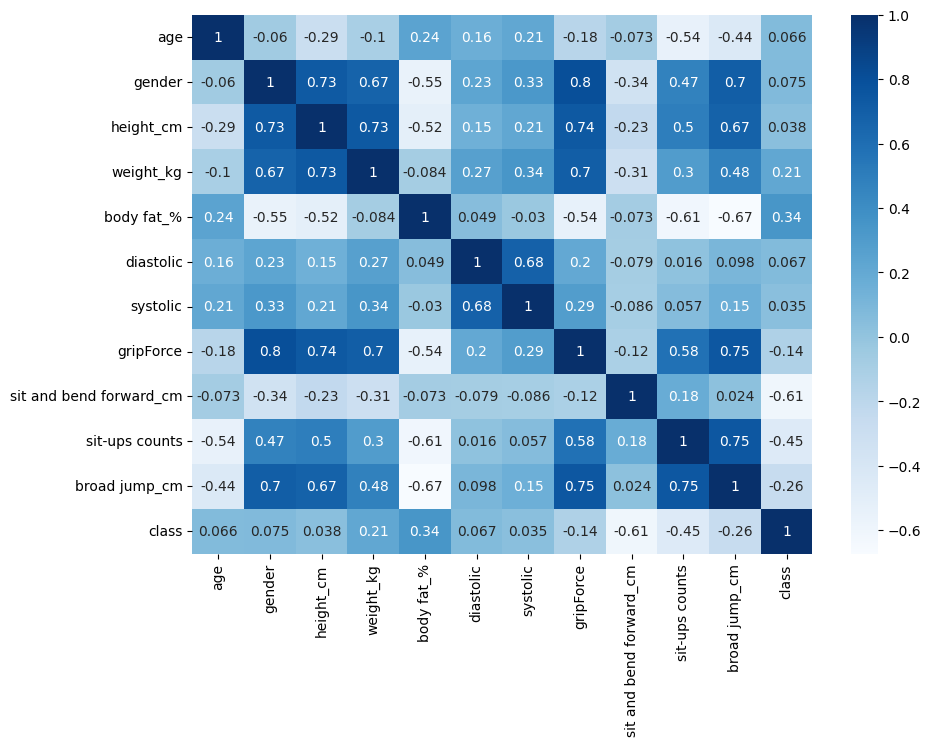

In [252]:
corr = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

<AxesSubplot: >

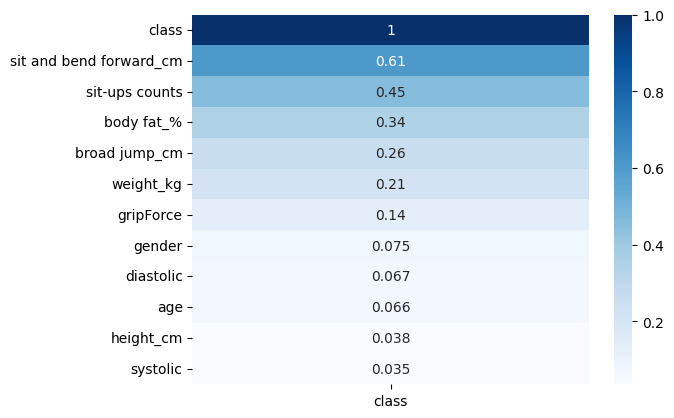

In [253]:
class_corr = corr[['class']].abs().sort_values('class', ascending= False)
sns.heatmap(class_corr,annot=True, cmap='Blues')

From the above we see that the performance measure (class) most strongly correlates to our fitness measures and the one characteristic measure, body fat percentage.

## 1. Body Mass Index Analysis
There are recommended levels of body fat for fitness performance and general health. As body fat cannot necessarily be readily measured at home, lets focus on a health indicator that you can calculate yourself, ie. Body Mass Index (BMI). There are [recommended bmi scores](https://www.cdc.gov/healthyweight/assessing/index.html) for health performance.

So how many of our participants were in the recommended range?

In [254]:
def bmi_calculator(weight_kg, height_cm):
    """Calculate bmi based on weight_kg and height_cm"""
    return weight_kg/(height_cm/100)**2

def bmi_category(bmi):
    """Calculate bmi category based on bmi value"""
    if bmi<18.5:
       return "Underweight"
    elif bmi>=18.5 and bmi<25:
       return "Healthy"
    elif bmi>=25 and bmi<30:
       return "Overweight"
    else:
       return "Obese"

In [255]:
# create a new df for bmi and bmi category
df_bmi  = df.copy()

In [256]:
df_bmi['bmi'] = df_bmi.apply(lambda x: bmi_calculator(x['weight_kg'], x['height_cm']), axis=1)
df_bmi['bmi_category'] = df_bmi.apply(lambda x: bmi_category(x['bmi']), axis=1)
df_bmi.sample(n=5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,bmi,bmi_category
10395,60.0,0,155.6,58.80,33.00000,98.0,157.0,25.1,20.1,0.0,108.0,4,24.286120,Healthy
13222,42.0,1,172.4,73.22,17.90000,93.0,158.0,44.7,20.5,54.0,226.0,1,24.635149,Healthy
7321,28.0,1,169.6,69.60,28.75584,95.0,144.0,40.6,13.0,43.0,202.0,4,24.196778,Healthy
9781,33.0,1,178.1,81.10,18.40000,58.0,116.0,48.1,22.1,54.0,249.0,1,25.567780,Overweight
5676,40.0,1,172.0,67.80,20.70000,84.0,132.0,43.6,17.1,42.0,197.0,2,22.917793,Healthy


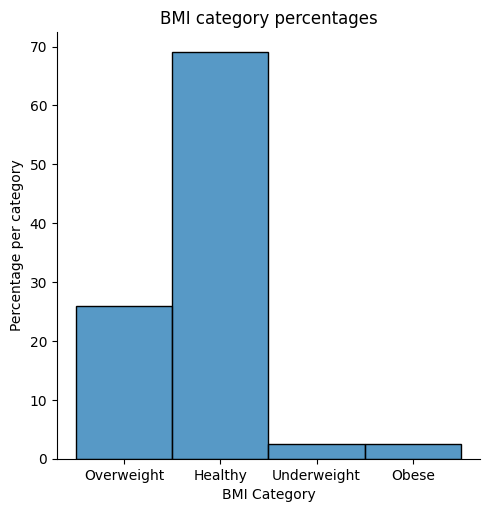

In [257]:
sns.displot(df_bmi, x='bmi_category',stat='percent').set(title='BMI category percentages', ylabel='Percentage per category', xlabel='BMI Category')

From the above we can see that most of the participants have healthy bmi scores (69%).

In [258]:
pd.set_option('display.float_format', '{:%}'.format)
cat_perc = df_bmi.bmi_category.value_counts(normalize=True).reset_index()
cat_perc['bmi_category'] = cat_perc.bmi_category.apply(lambda x: round(x, 2))
cat_perc

,index,bmi_category
0,Healthy,69.000000%
1,Overweight,26.000000%
2,Obese,3.000000%
3,Underweight,3.000000%


In [259]:
#reset pandas display
pd.reset_option("all")

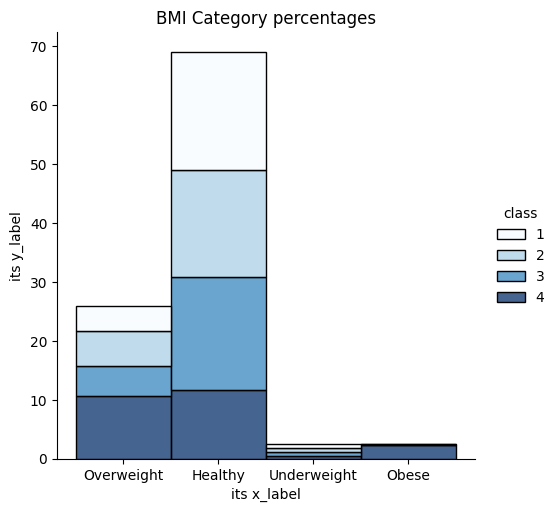

In [260]:
sns.displot(df_bmi, x='bmi_category',stat='percent', hue='class', multiple="stack",palette=sns_palette).set(title='BMI Category percentages', xlabel='its x_label', ylabel='its y_label')

In [261]:
df_bmi.groupby('class')['bmi_category'].value_counts(normalize=True)

class  bmi_category
1      Healthy         0.798327
       Overweight      0.170003
       Underweight     0.029280
       Obese           0.002390
2      Healthy         0.726621
       Overweight      0.239020
       Underweight     0.026591
       Obese           0.007768
3      Healthy         0.771574
       Overweight      0.200657
       Underweight     0.025082
       Obese           0.002687
4      Healthy         0.463422
       Overweight      0.426993
       Obese           0.089579
       Underweight     0.020006
Name: bmi_category, dtype: float64

By grouping the participants by class we can see that in the best performing class almost 80% of the participants had healthy bmi scores and almost no participants were obese.

## 2. Does fitness performance decline with age?
Intuitively I would assume that as age one ages, your health and fitness decline. Let's have a look at age and the 4 are fitness related measures.

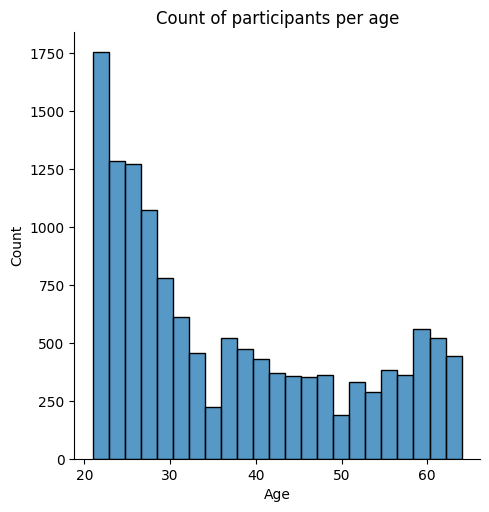

In [262]:
# how does our age data look
sns.displot(df['age']).set(title='Count of participants per age', xlabel='Age', ylabel='Count');

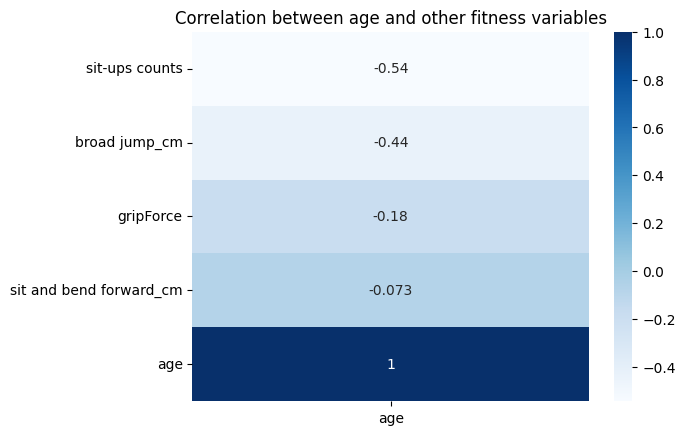

In [263]:
# now lets look at our fitness columns related to age
corr = df[['age','gripForce','sit and bend forward_cm','sit-ups counts','broad jump_cm']].corr()
age_corr = corr[['age']].sort_values('age', ascending= True)
sns.heatmap(age_corr,annot=True, cmap='Blues').set(title='Correlation between age and other fitness variables');

We can see that there is a negative correlation between age and the fitness measures. Sit-up counts are the most correlated with age, let's look at this visually.

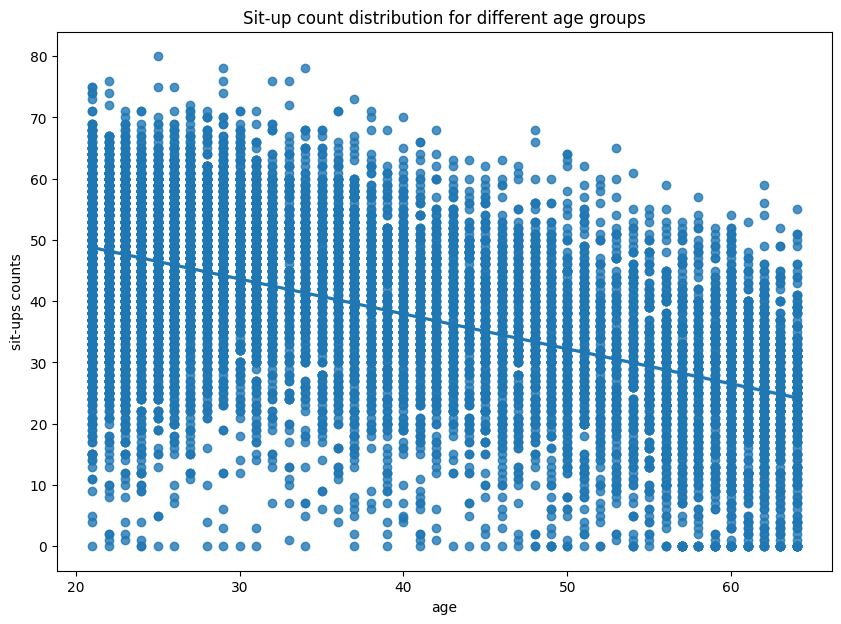

In [264]:
# Plot data and a linear regression model fit
plt.figure(figsize=(10, 7))
sns.regplot(data = df, x="age", y='sit-ups counts', ci=95).set(title='Sit-up count distribution for different age groups');

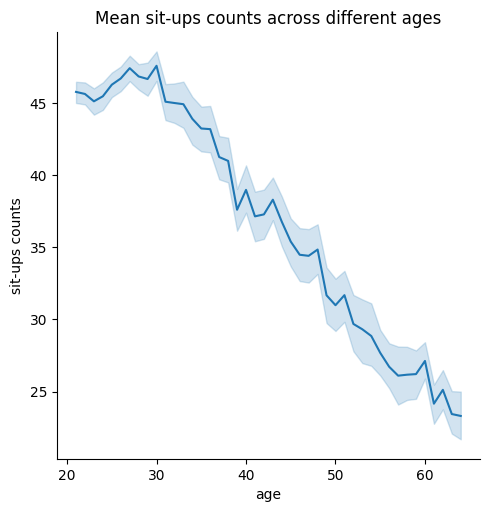

In [265]:
# Aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:
# sns.relplot(data=df, x="age", y='sit-ups counts', kind="line", hue = 'class',palette='Blues')
sns.relplot(data=df, x="age", y='sit-ups counts', kind="line").set(title=f'Mean sit-ups counts across different ages');

From the above we can see there is a clear decreasing trend in sit up counts once the participants reach a certain age. Now let's look at the other fitness measures.

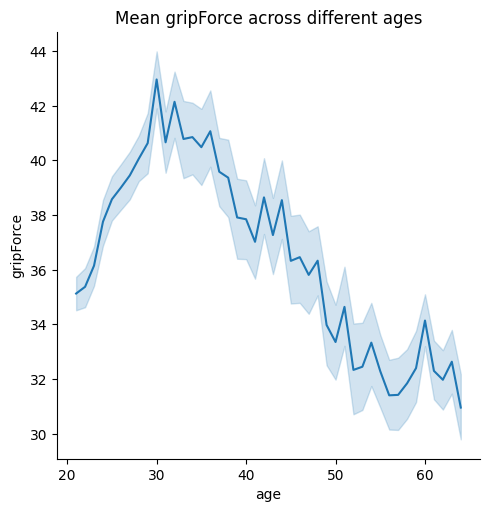

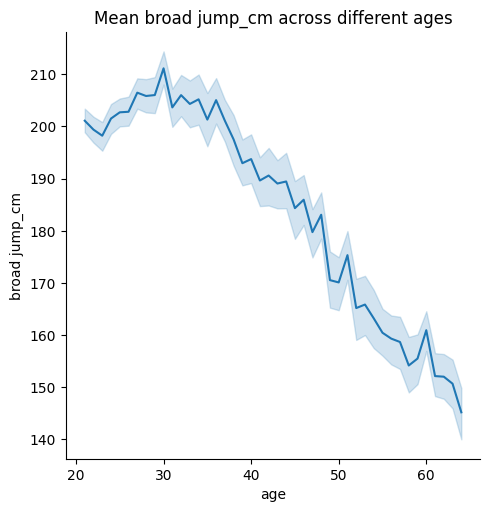

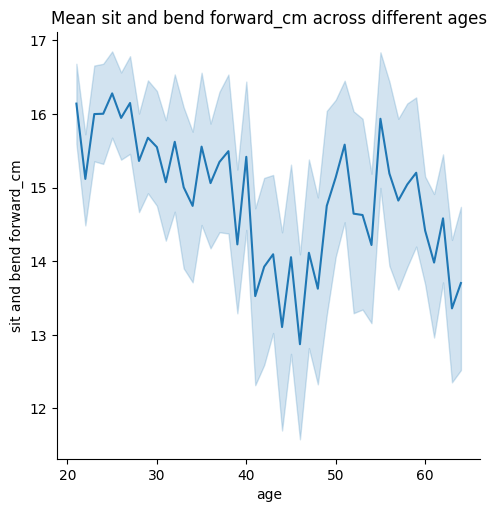

In [266]:
# Aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:
fitcols = ['gripForce','broad jump_cm','sit and bend forward_cm']
for i in range(len(fitcols)):
    sns.relplot(data=df, x="age", y=fitcols[i], kind="line").set(title=f'Mean {fitcols[i]} across different ages')

Interestingly, for strength measures such as sit up count, grip force and broad jump, it seems that performance increases up to late 20s and then declines with age. Let's have a look if this will change if we split the data between genders. Note that 1 indicates male and 0 indicates female.

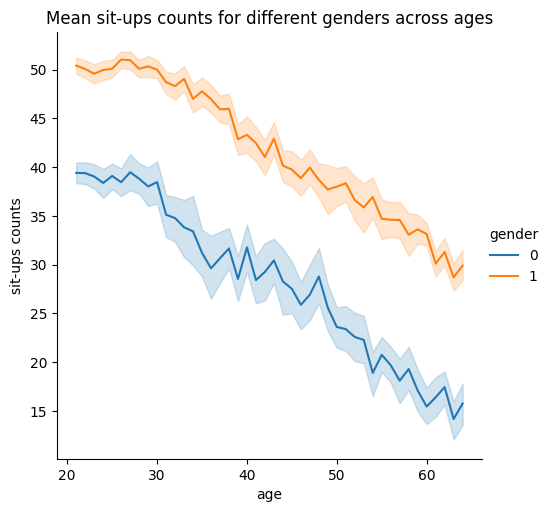

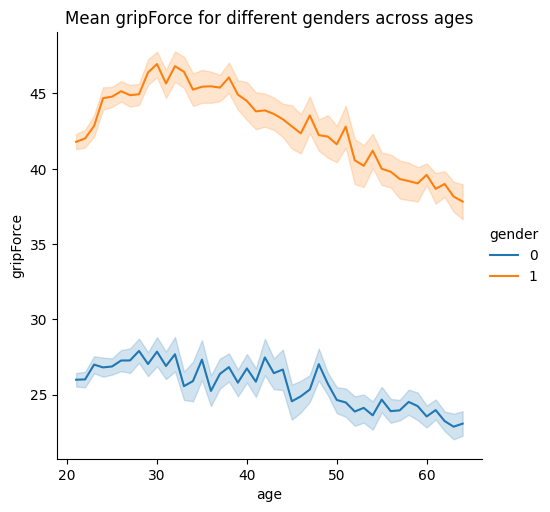

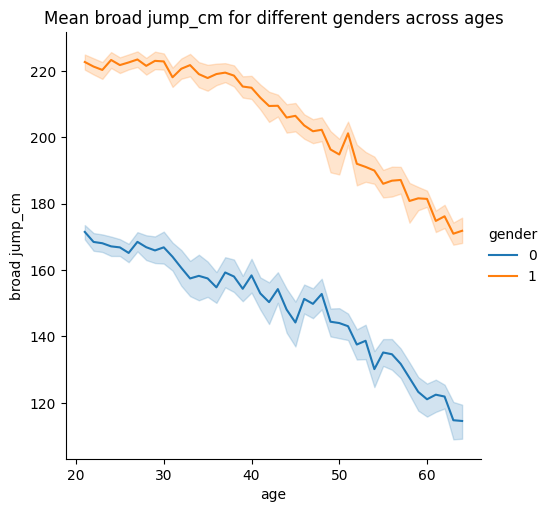

In [267]:
# Aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:
fitcols = ['sit-ups counts','gripForce','broad jump_cm']
for i in range(len(fitcols)):
    sns.relplot(data=df, x="age", y=fitcols[i],hue ="gender", kind="line").set(title=f'Mean {fitcols[i]} for different genders across ages')

We can see the trend stays relatively the same. However, it seems like fitness performance differs substantially between males (1) and females(0).

## 2. Do males outperform females in terms of fitness performance?
From the above graphs we can already see that the fitness scores for males tend to be higher than those of females. 

Does this mean males are fitter than females? Not necessarily, it is important to look at other factors that may influence fitness measures such as height or weight. Let's have a look at how males and females compare in terms of the other characteristics.

In [268]:
# Let's look at height as an example
# mean height for complete dataset
df.height_cm.mean()

168.56067054958183

In [269]:
# Let's split the averages between genders
ave_male_height = df[df.gender==1]['height_cm'].mean()
ave_female_height = df[df.gender==0]['height_cm'].mean()

print(f"Average male height: { ave_male_height } cm")
print(f"Average female height: {ave_female_height} cm")

Average male height: 173.25739931498762 cm
Average female height: 160.4861116751269 cm


In [270]:
percentage_change = ((ave_male_height-ave_female_height)/ave_female_height)*100
print(f"In fact, male average height is {round(percentage_change)}% higher than female average height.")

In fact, male average height is 8% higher than female average height.


(135.0, 195.0)

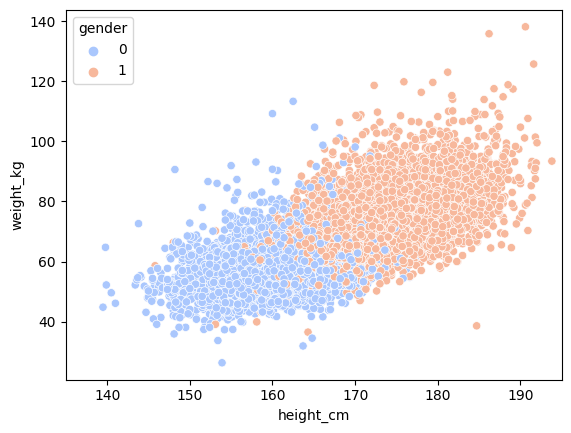

In [271]:
# Let's look at a visual comparison between both the height and weight of the genders
# compare weight and heigh between genders
sns.scatterplot(x='height_cm',y='weight_kg',data=df,hue='gender',palette='coolwarm')
plt.xlim(135,195)

From the above graph we can see that males tend to bee taller and heavier than females. The genders therefore seem to have different physical characteristics on average.

Let's look at another physical characteristic - body fat_%.

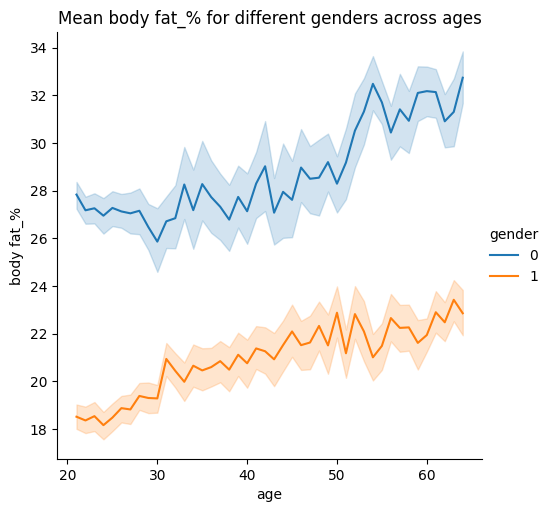

In [277]:
sns.relplot(data=df, x="age", y='body fat_%', kind="line", hue = "gender").set(title=f'Mean body fat_% for different genders across ages');

We see that on average, females tend to have higher fat percentages than males. Is this bad? No, in fact it is [recommended](https://www.forbes.com/health/body/body-fat-percentage/#:~:text=It%20can%20safely%20go%20as%20low%20as%2010%25%20for%20women%20and%203%25%20for%20men%2C%20according%20to%20the%20American%20College%20of%20Sports%20Medicine%20(ACSM).%20With%20that%20said%2C%20normal%20body%20fat%20percentage%20ranges%20that%20are%20generally%20considered%20healthy%20for%20both%20men%20and%20women%20are%20provided%20in%20the%20chart%20below.). 


It is therefore important to note, that although males can achiever higher scores on fitness measures, it does not mean they are necessarily healthier. To illustrate this further, please see below the fitness score outcomes in class and it's distribution between males and females.

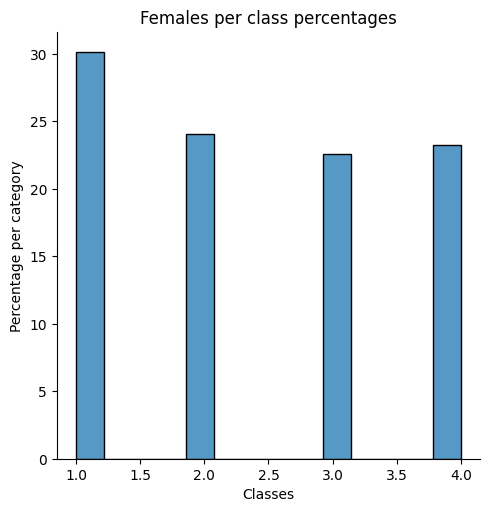

In [273]:
sns.displot(df[df.gender==0], x='class',stat='percent').set(title='Females per class percentages', ylabel='Percentage per category', xlabel='Classes');

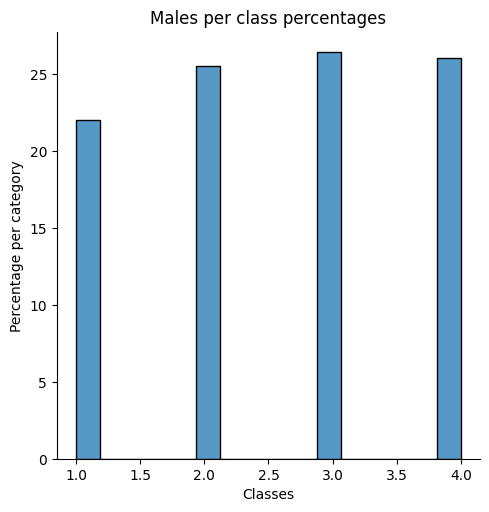

In [274]:
sns.displot(df[df.gender==1], x='class',stat='percent').set(title='Males per class percentages', ylabel='Percentage per category', xlabel='Classes');

In [282]:
# female
df[df.gender==0]['class'].value_counts(normalize=True)

1    0.301117
2    0.240609
4    0.232487
3    0.225787
Name: class, dtype: float64

In [283]:
# male
df[df.gender==1]['class'].value_counts(normalize=True)

3    0.264202
4    0.260305
2    0.255344
1    0.220149
Name: class, dtype: float64

These graphs shows that, as a percentage, more females were classified in to class one than males.

## Fin

In [275]:
# Please ignore the commented out code below
# fitcols = ['sit-ups counts','gripForce','broad jump_cm','sit and bend forward_cm']
# fitcols = ['sit and bend forward_cm']

# df.groupby('age')[fitcols].mean()
# df.groupby('age')[fitcols].mean().plot(kind='line', figsize=(15, 5), title='Fitness related columns per age', xlabel='Age', ylabel='Average value');

# boxplot illustration
# plt.figure(figsize=(20, 7))
# sns.boxplot(x='age',y='sit-ups counts',data=df,palette='Blues').set(title='Sit-up count distribution for different age groups');

# fig, axes = plt.subplots(ncols = 4, figsize=(15,6))
# cats = ['gripForce','sit and bend forward_cm','sit-ups counts','broad jump_cm']
# for i in range(len(cats)):
#     sns.boxplot(x='age',y=cats[i],data=df,palette='Blues',ax=axes[i])

# fig = px.box(df, x="age", y="broad jump_cm",
#              title = 'Representation of Age with Gender')
# fig.show()

# sns.displot(df, x="weight_kg", y="height_cm",kind="kde")

# sns.regplot(data = df, x="weight_kg", y="height_cm", ci=95)
# sns.displot(x= 'height_cm', data = df, hue = "gender")

#lets see this visually
# sns.displot(x= 'weight_kg', data = df, hue = "gender").set(title='Weight by gender');

# fig, axes = plt.subplots(ncols = 4, figsize=(15,6))
# fitcols = ['gripForce','sit and bend forward_cm','sit-ups counts','broad jump_cm']
# for i in range(len(fitcols)):
#     sns.boxplot(x='gender',y=fitcols[i],data=df,palette='coolwarm',ax=axes[i],hue='class')
